<a href="https://colab.research.google.com/github/radamesk9/3dconverter/blob/main/phototo3dconverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código para gerar o cubo

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

[-1 -1 -1]
[-1  1 -1]
[ 1 -1 -1]
[ 1 -1 -1]
[-1  1 -1]
[ 1  1 -1]
[-1 -1 -1]
[-1 -1  1]
[-1  1  1]
[-1 -1 -1]
[-1  1  1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 1 1]
[-1 -1  1]
[1 1 1]
[-1  1  1]
[ 1 -1  1]
[ 1 -1 -1]
[ 1  1 -1]
[ 1 -1  1]
[ 1  1 -1]
[1 1 1]
[ 1  1 -1]
[-1  1 -1]
[1 1 1]
[-1  1 -1]
[-1  1  1]
[1 1 1]
[-1 -1 -1]
[ 1 -1 -1]
[ 1 -1  1]
[-1 -1 -1]
[ 1 -1  1]
[-1 -1  1]


Instalação do numpy

In [ ]:
!pip3 install numpy-stl

     |████████████████████████████████| 772 kB 5.3 MB/s 
  Created wheel for numpy-stl: filename=numpy_stl-2.16.3-cp37-cp37m-linux_x86_64.whl size=136648 sha256=2025c84f489bbede952c92590afa15f0c905b747299f3efb927a23051ed5ef81
  Stored in directory: /root/.cache/pip/wheels/06/f4/db/7fac39962a6ba79b7e740892042332083924bff552d4bef41e
Successfully built numpy-stl


Ler a imagem pelo arquivo que foi inserido na tela

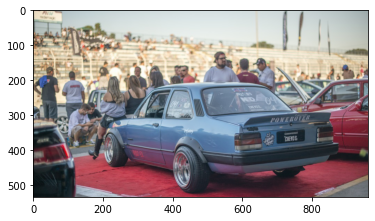

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/chevette.jpg")
plt.imshow(im)

converter imagem para escala em cinza

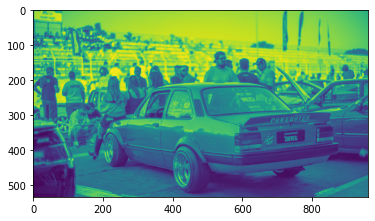

In [ ]:
grey_img = Image.open('/content/chevette.jpg').convert('L')
plt.imshow(grey_img)

In [ ]:
Código que cria apenas uma superfície do cubo, apenas uma face

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    ])
# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0]
    ])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "surface.stl"
cube.save('surface.stl')

[ 1 -1 -1]
[ 1  1 -1]
[-1  1 -1]
[-1  1 -1]
[ 1 -1 -1]
[-1 -1 -1]


Criar uma superficie com 1000x5000 com N triangulos

In [ ]:
grey_img = Image.open('/content/chevette.jpg').convert('L')

max_size = (50, 50)
min_height = 0
max_height = 10

grey_img.thumbnail(max_size)
print(f"Image size after resizing: {grey_img.size}")

print(grey_img.mode)
imageNp = np.array(grey_img)

maxPix = imageNp.max()
minPix = imageNp.min()
print(f"maximo é>>> {imageNp.max()}")
print(f"minimo é>>> {imageNp.min()}")
print(f"shape: {imageNp.shape}")

print(imageNp)
(ncols, nrows) = grey_img.size

print(f"size is: {grey_img.size}")

print(grey_img.mode)
imageNp = np.array(grey_img)

vertices = np.zeros((nrows, ncols, 3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = pixelIntensity * max_height / maxPix
    #print(imageNp[y][x])
    vertices[y][x] = (x, y, z)

faces = [] 
for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    z = 0
    #cria a face número 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1, vertice2, vertice3])
    
    #cria a face número 2
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]
    face2 = np.array([vertice1, vertice2, vertice3])
    
    #triangle 1 and triangle 2
    faces.append(face1)
    faces.append(face2)

    #print(f"number of faces: {len(faces)}")
    facesNp = np.array(faces)
  # Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]

surface.save('surfacenew.stl')
print(surface)

Image size after resizing: (50, 28)
L
maximo é>>> 242
minimo é>>> 19
shape: (28, 50)
[[204 207 208 ... 183 177 171]
 [180 193 200 ... 189 183 177]
 [170 182 182 ... 194 188 182]
 ...
 [ 19  24  30 ... 105 116 117]
 [ 20  25  31 ... 125 117 110]
 [ 20  22  24 ... 114 116 111]]
size is: (50, 28)
L
